# Synthetic seismic: wedge

In [1]:
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

In [2]:
length = 200 # x range
depth = 500  # z range

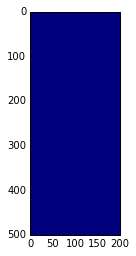

In [3]:
m = np.ones((depth, length))
plt.imshow(m)
plt.show()

In [4]:
m = np.triu(m, -depth//3)

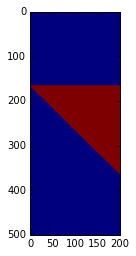

In [5]:
m[:depth//3,:] = 0
plt.imshow(m)
plt.show()

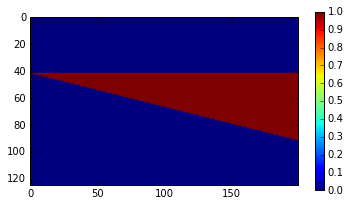

In [6]:
model = m[::4,:]
plt.imshow(model)
plt.colorbar(shrink=0.8)
plt.show()

Now we can make some Vp-rho pairs (rock 0 and rock 1) and select from those with `np.take`.

In [7]:
rocks = np.array([[2700, 2750], [2400,2450]])
earth = np.take(rocks, model.astype(int), axis=0)

Now apply `np.product` to those Vp-rho pairs to get impedance at every sample.

In [8]:
imp = np.apply_along_axis(np.product, -1, earth)

Now we define a function to compute reflection coefficients for every trace.

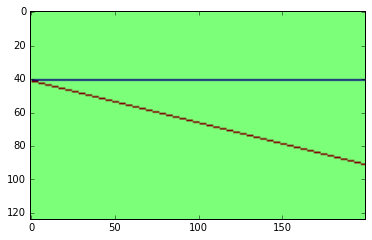

In [9]:
def make_rc(imp):
    upper = imp[ :-1, :]
    lower = imp[1:  , :]
    
    return (lower - upper) / (lower + upper)

rc = make_rc(imp)
plt.imshow(rc)
plt.show()

We'll use `scipy.signal.ricker` to make a wavelet, and apply 1D convolution to every trace:

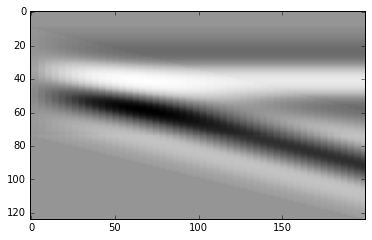

In [10]:
from scipy.signal import ricker

f = 25
wavelet = ricker(64, 1000/(4*f))

synth = np.apply_along_axis(lambda t: np.convolve(t, wavelet, mode='same'),
                            axis=0,
                            arr=rc)

plt.imshow(synth, cmap="Greys")
plt.show()